In [1]:
import eqnet_format

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.tensor.blas): Failed to import scipy.linalg.blas, and Theano flag blas.ldflags is empty. Falling back on slower implementations for dot(matrix, vector), dot(vector, matrix) and dot(vector, vector) (No module named 'scipy._lib')


In [2]:
from eqnet_format import get_random_ksat, cnf_to_eqnet, get_encoder, l2, get_false_encoding, DPLL, mean, stdev

In [3]:
#from sklearn.metrics import roc_auc_score

In [4]:
ENCODER = get_encoder()
ANA_ENCODING = ENCODER.get_encoding(cnf_to_eqnet([[1], [-1]]))
BNB_ENCODING = ENCODER.get_encoding(cnf_to_eqnet([[2], [-2]]))
def dist_to_false(x):
    return l2(x, FALSE_ENCODING)

Compiling Methods...
Compilation Finished...


In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy

In [25]:
def gen_and_compare():
    encodings = []
    for i in range(1, 10):
        encoding = ENCODER.get_encoding(cnf_to_eqnet([[i], [-i]]))
        encodings.append(encoding)
    #avg_encoding = sum(encodings)/len(encodings)
    #encodings.append(avg_encoding)
    for i in range(len(encodings)):
        for j in range(len(encodings)):
            print(round(l2(encodings[i], encodings[j]), 2), end="\t")
        print()
    print()
    print()
    for i in range(len(encodings)):
        the_rest = encodings[:i] + encodings[i+1:]
        rest_encoding = sum(the_rest)/len(the_rest)
        print(l2(encodings[i], rest_encoding))
gen_and_compare()

0.0	1.14	1.07	1.31	0.98	0.92	1.05	1.09	1.24	
1.14	0.0	0.9	0.61	0.5	0.97	1.08	0.61	1.04	
1.07	0.9	0.0	0.95	0.82	0.88	0.99	0.9	0.8	
1.31	0.61	0.95	0.0	0.87	1.27	1.23	0.85	0.87	
0.98	0.5	0.82	0.87	0.0	0.74	0.97	0.58	1.13	
0.92	0.97	0.88	1.27	0.74	0.0	0.54	1.1	1.11	
1.05	1.08	0.99	1.23	0.97	0.54	0.0	1.24	0.96	
1.09	0.61	0.9	0.85	0.58	1.1	1.24	0.0	1.3	
1.24	1.04	0.8	0.87	1.13	1.11	0.96	1.3	0.0	


0.91161954
0.5854785
0.6324774
0.79126734
0.51230586
0.70731336
0.8009557
0.74756867
0.8622941


In [6]:
def gen_and_print(num, k, n, m):
    trues_ana = []
    trues_bnb = []
    trues_avg = []
    falses_ana = []
    falses_bnb = []
    falses_avg = []
    for i in range(num):
        rsat = get_random_ksat(k, n, m)
        clauses = [list(clause) for clause in rsat.clauses]
        eqnet_form = cnf_to_eqnet(clauses)
        encoding = ENCODER.get_encoding(eqnet_form)
        dist_ana = l2(encoding, ANA_ENCODING)
        dist_bnb = l2(encoding, BNB_ENCODING)
        dist_avg = l2(encoding, (ANA_ENCODING + BNB_ENCODING) / 2.)
        if DPLL().run(rsat):
            trues_ana.append(dist_ana)
            trues_bnb.append(dist_bnb)
            trues_avg.append(dist_avg)
        else:
            falses_ana.append(dist_ana)
            falses_bnb.append(dist_bnb)
            falses_avg.append(dist_avg)
    print("#trues_ana: {}; avg dist: {}; stdev dist: {}".format(
        len(trues_ana), mean(trues_ana), stdev(trues_ana)))
    print("#trues_bnb: {}; avg dist: {}; stdev dist: {}".format(
        len(trues_bnb), mean(trues_bnb), stdev(trues_bnb)))
    print("#trues_avg: {}; avg dist: {}; stdev dist: {}".format(
        len(trues_avg), mean(trues_avg), stdev(trues_avg)))
    print("#falses_ana: {}; avg dist: {}; stdev dist: {}".format(
        len(falses_ana), mean(falses_ana), stdev(falses_ana)))
    print("#falses_bnb: {}; avg dist: {}; stdev dist: {}".format(
        len(falses_bnb), mean(falses_bnb), stdev(falses_bnb)))
    print("#falses_avg: {}; avg dist: {}; stdev dist: {}".format(
        len(falses_avg), mean(falses_avg), stdev(falses_avg)))
    name = "{}-sats with {} vars and {} clauses".format(k, n, m)
    plt.title("Dist to ana of True {}".format(name))
    plt.hist(trues_ana, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    plt.title("Dist to bnb of True {}".format(name))
    plt.hist(trues_bnb, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    plt.title("Dist to avg of True {}".format(name))
    plt.hist(trues_avg, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    
    plt.title("ana vs bnb of True {}".format(name))
    plt.scatter(trues_ana, trues_bnb)
    plt.show()
    plt.title("ana vs avg of True {}".format(name))
    plt.scatter(trues_ana, trues_avg)
    plt.show()
    
    plt.title("Dist to ana of False {}".format(name))
    plt.hist(falses_ana, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    plt.title("Dist to bnb of False {}".format(name))
    plt.hist(falses_bnb, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    plt.title("Dist to avg of False {}".format(name))
    plt.hist(falses_avg, bins=numpy.linspace(0, 1.5, 21))
    plt.show()
    
    plt.title("ana vs bnb of False {}".format(name))
    plt.scatter(falses_ana, falses_bnb)
    plt.show()
    plt.title("ana vs avg of False {}".format(name))
    plt.scatter(falses_ana, falses_avg)
    plt.show()

#trues_ana: 918; avg dist: 0.7781582093901105; stdev dist: 0.3075378818709584
#trues_bnb: 918; avg dist: 1.0644107288265021; stdev dist: 0.12728572725957907
#trues_avg: 918; avg dist: 0.7591841483168092; stdev dist: 0.14995743409555684
#falses_ana: 82; avg dist: 0.7503900149973427; stdev dist: 0.35319105912329724
#falses_bnb: 82; avg dist: 0.9430509551269252; stdev dist: 0.21170175295062418
#falses_avg: 82; avg dist: 0.6899252730171855; stdev dist: 0.09594800712102844


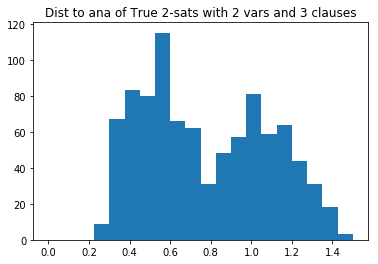

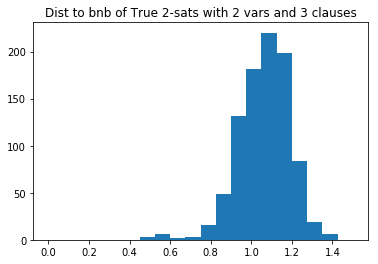

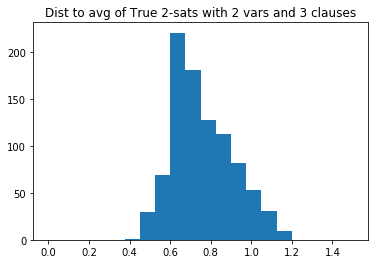

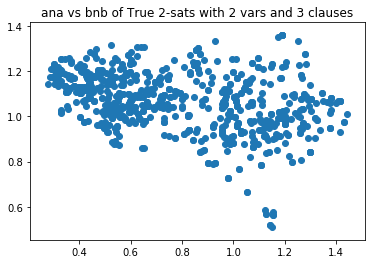

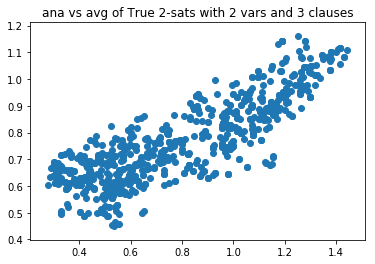

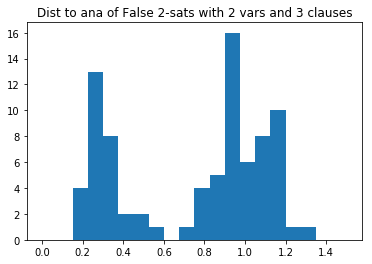

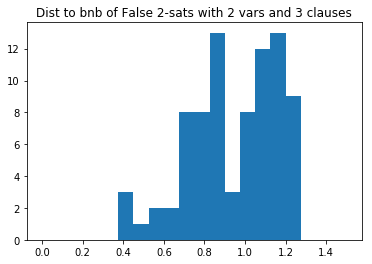

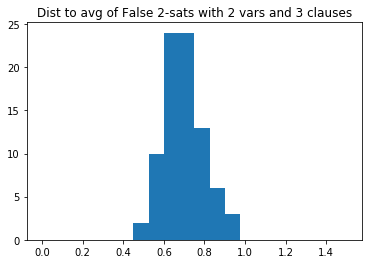

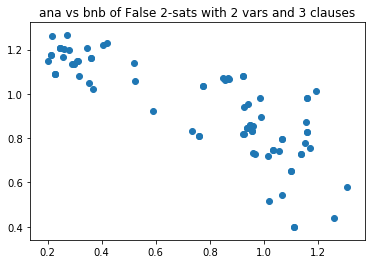

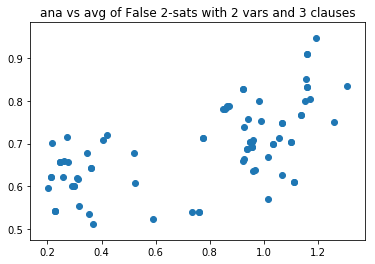

In [7]:
gen_and_print(1000, 2, 2, 3)

#trues_ana: 815; avg dist: 0.7964505171848952; stdev dist: 0.2671233760102369
#trues_bnb: 815; avg dist: 0.9944109128296741; stdev dist: 0.09957310361154195
#trues_avg: 815; avg dist: 0.7155327904809472; stdev dist: 0.12019949488010734
#falses_ana: 185; avg dist: 0.730798314713143; stdev dist: 0.3037519040597976
#falses_bnb: 185; avg dist: 0.9705119861138833; stdev dist: 0.11552064177947975
#falses_avg: 185; avg dist: 0.6720054017530905; stdev dist: 0.11576141417379407


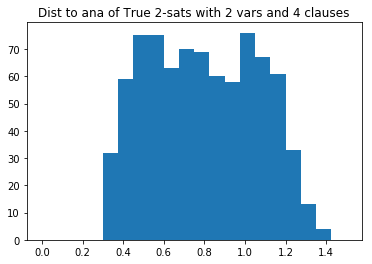

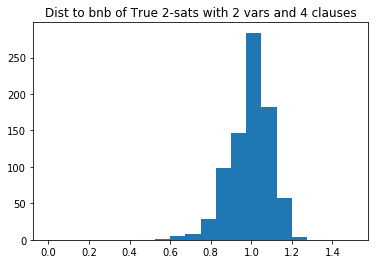

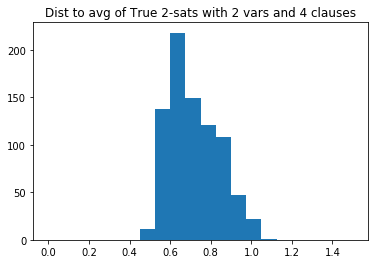

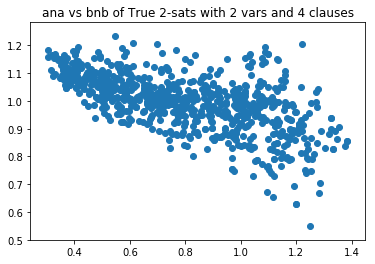

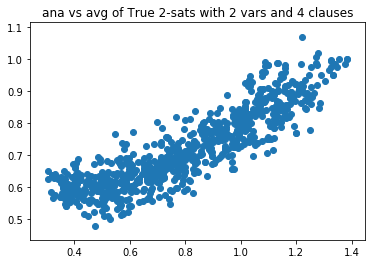

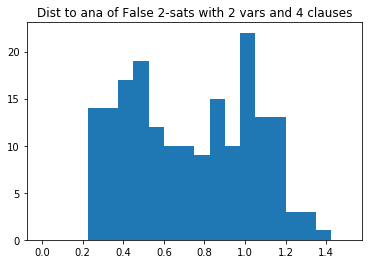

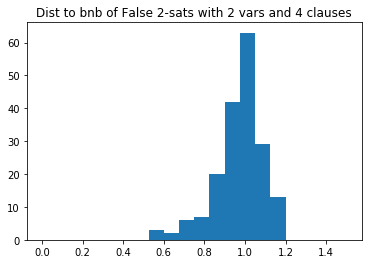

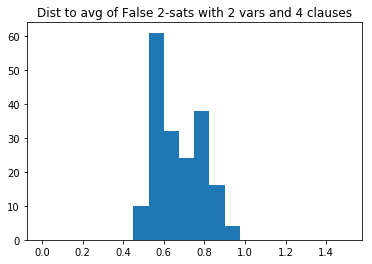

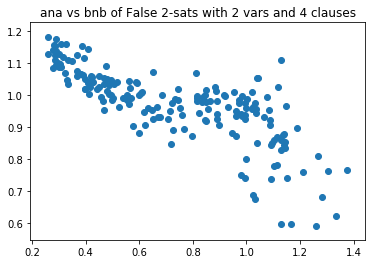

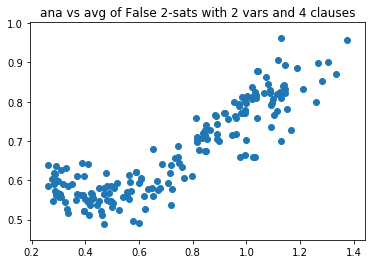

In [8]:
gen_and_print(1000, 2, 2, 4)

#trues_ana: 700; avg dist: 0.7796547808391707; stdev dist: 0.24641694262388714
#trues_bnb: 700; avg dist: 1.0060097987311227; stdev dist: 0.0828979135671288
#trues_avg: 700; avg dist: 0.7106981078641755; stdev dist: 0.11344836328627636
#falses_ana: 300; avg dist: 0.770709922115008; stdev dist: 0.25594999848906486
#falses_bnb: 300; avg dist: 0.974157533844312; stdev dist: 0.09234430914374746
#falses_avg: 300; avg dist: 0.6873861846327781; stdev dist: 0.10106688443329069


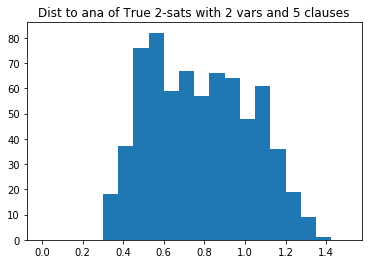

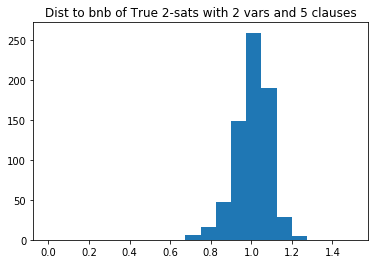

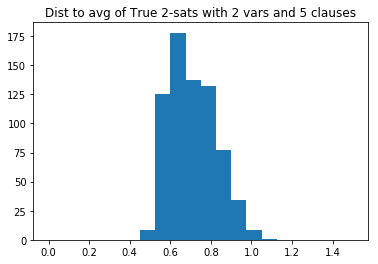

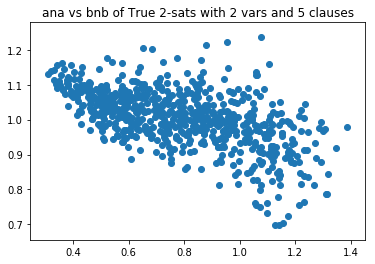

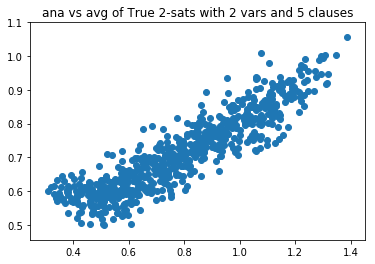

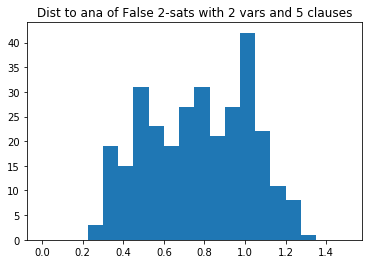

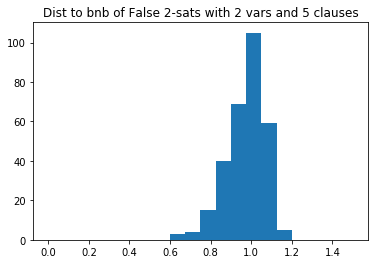

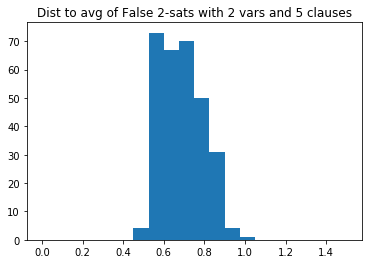

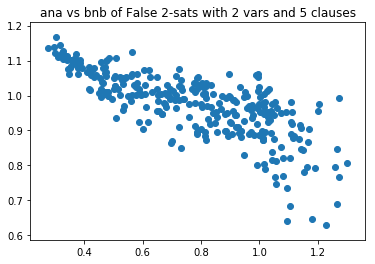

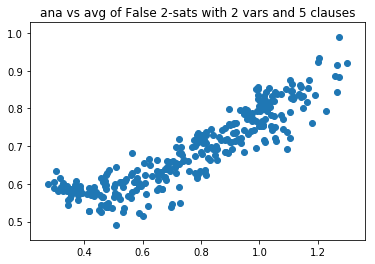

In [9]:
gen_and_print(1000, 2, 2, 5)

#trues_ana: 20; avg dist: 0.7422488629817963; stdev dist: 0.1158713230269754
#trues_bnb: 20; avg dist: 1.0658473074436188; stdev dist: 0.04848180798180479
#trues_avg: 20; avg dist: 0.7227696418762207; stdev dist: 0.056403066905539805
#falses_ana: 80; avg dist: 0.7664382271468639; stdev dist: 0.14302483843152322
#falses_bnb: 80; avg dist: 1.0419680669903755; stdev dist: 0.04138926130726064
#falses_avg: 80; avg dist: 0.7192629538476467; stdev dist: 0.0671929566972652


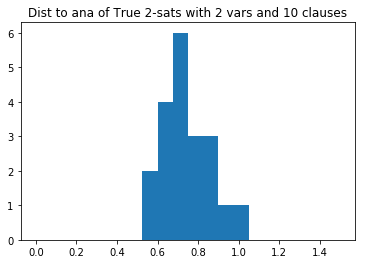

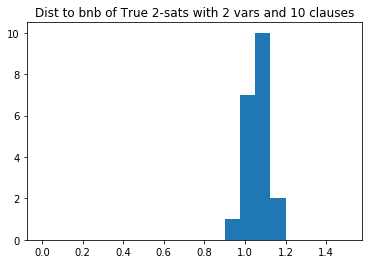

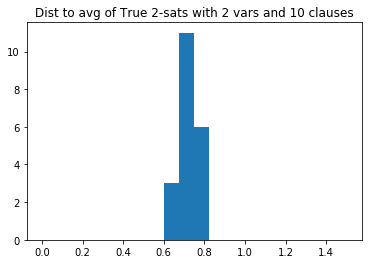

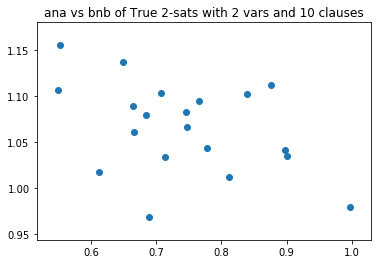

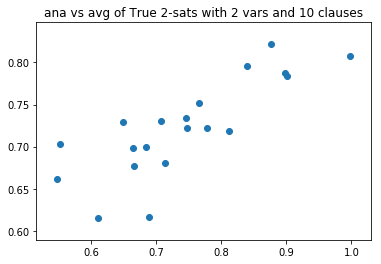

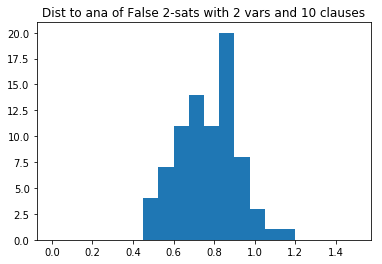

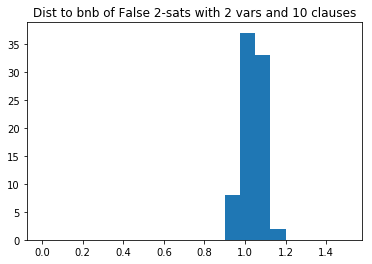

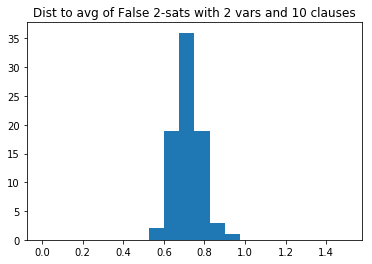

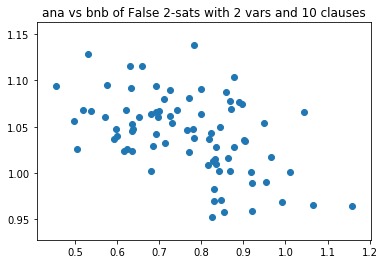

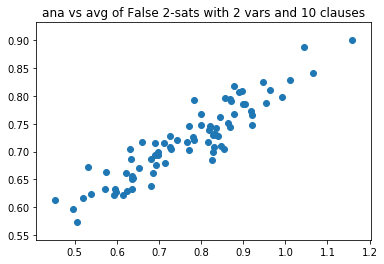

In [10]:
gen_and_print(100, 2, 2, 10)

#trues_ana: 950; avg dist: 0.8303197915616788; stdev dist: 0.16629089270194908
#trues_bnb: 950; avg dist: 1.0291230304617631; stdev dist: 0.05499125041910673
#trues_avg: 950; avg dist: 0.746934944516734; stdev dist: 0.07678620793858953
#falses_ana: 50; avg dist: 0.7825249207019805; stdev dist: 0.16736789575706687
#falses_bnb: 50; avg dist: 1.0236855113506318; stdev dist: 0.05293142060320812
#falses_avg: 50; avg dist: 0.717745018005371; stdev dist: 0.0677835935188329


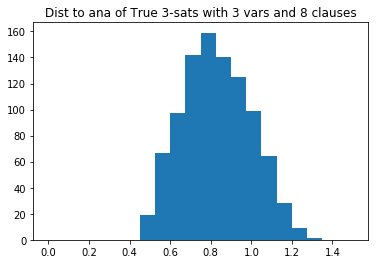

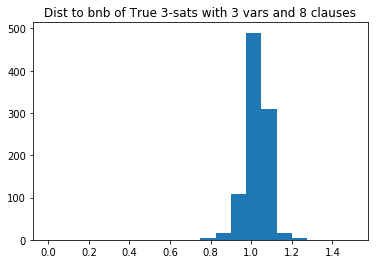

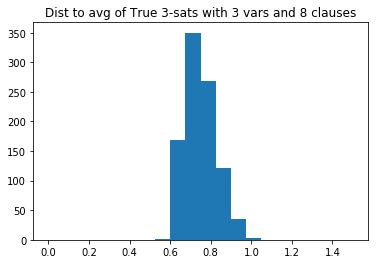

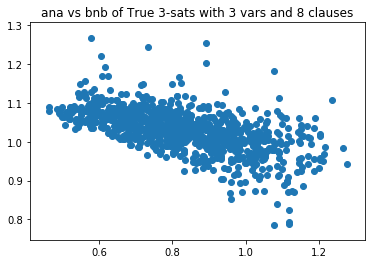

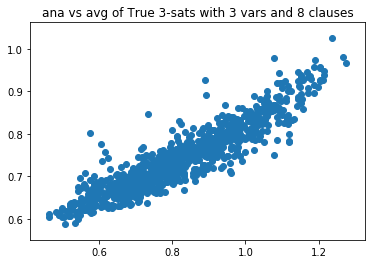

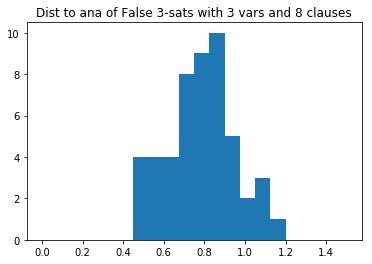

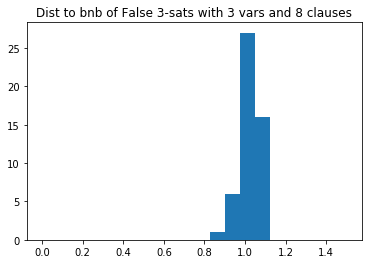

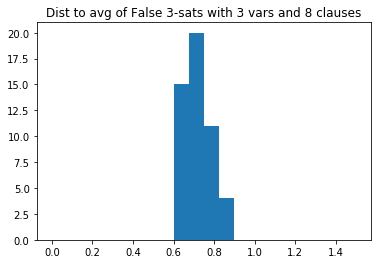

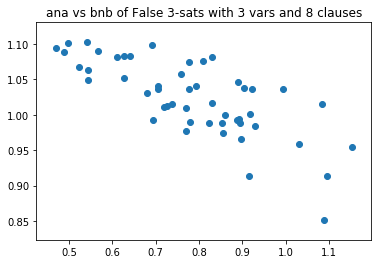

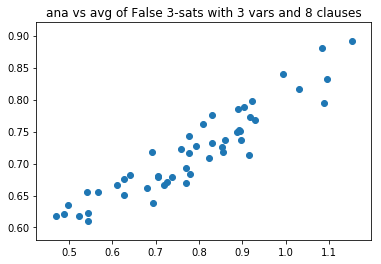

In [11]:
gen_and_print(1000, 3, 3, 8)

#trues_ana: 555; avg dist: 0.7876585808423189; stdev dist: 0.1165902269972283
#trues_bnb: 555; avg dist: 1.126990618362083; stdev dist: 0.024826772082258485
#trues_avg: 555; avg dist: 0.789793902796668; stdev dist: 0.05286170583392993
#falses_ana: 445; avg dist: 0.7828470144379005; stdev dist: 0.11320097354035656
#falses_bnb: 445; avg dist: 1.1274494406882296; stdev dist: 0.024257106810568342
#falses_avg: 445; avg dist: 0.7875482583313845; stdev dist: 0.051691515521271866


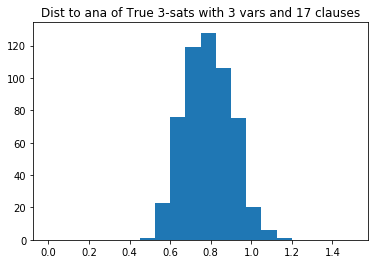

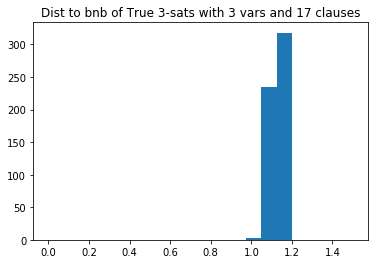

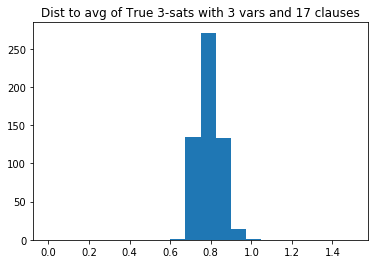

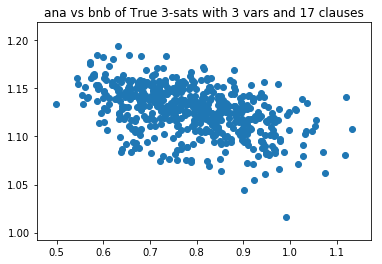

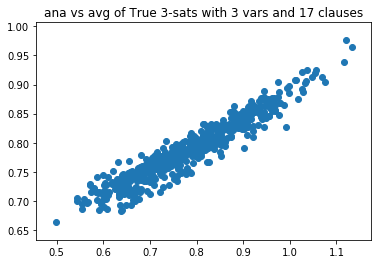

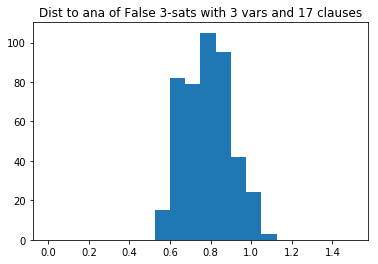

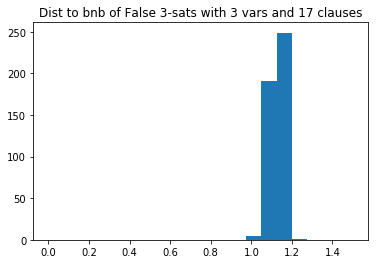

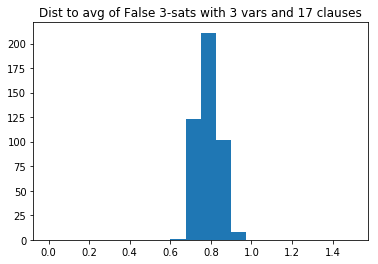

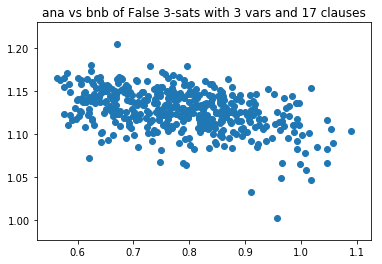

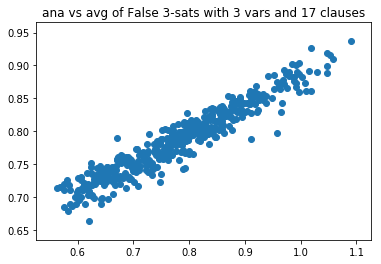

In [12]:
gen_and_print(1000, 3, 3, 17)

#trues_ana: 120; avg dist: 1.1609637121359506; stdev dist: 0.07094634645774679
#trues_bnb: 120; avg dist: 1.1554785639047622; stdev dist: 0.03235674395867346
#trues_avg: 120; avg dist: 1.008547331392765; stdev dist: 0.03953690068323704
#falses_ana: 880; avg dist: 1.1541926402259957; stdev dist: 0.06852146920521192
#falses_bnb: 880; avg dist: 1.1515327950770204; stdev dist: 0.027879776916359723
#falses_avg: 880; avg dist: 1.002333105694164; stdev dist: 0.03695661329730087


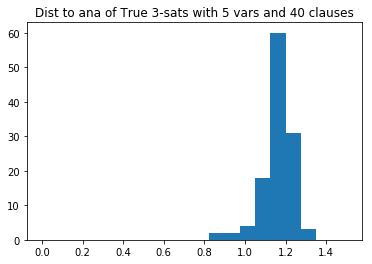

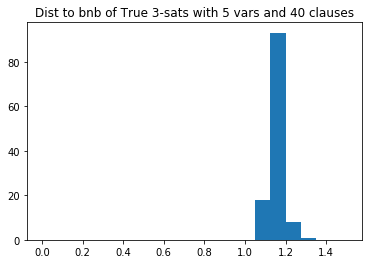

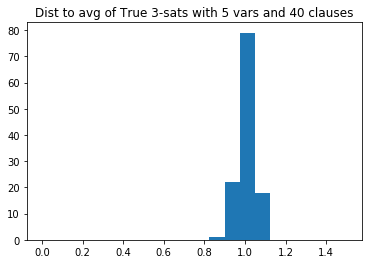

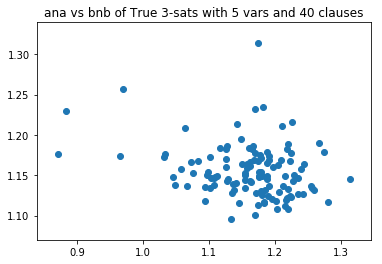

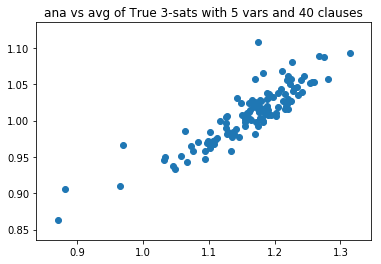

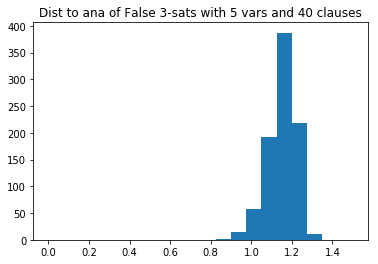

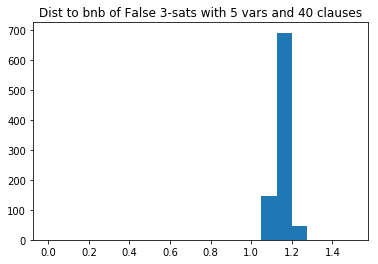

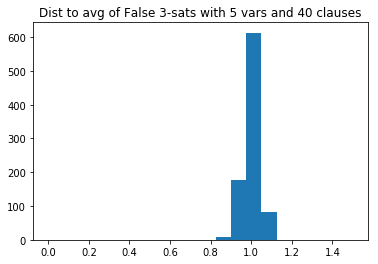

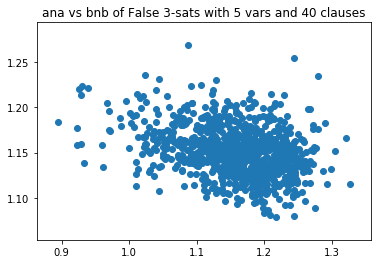

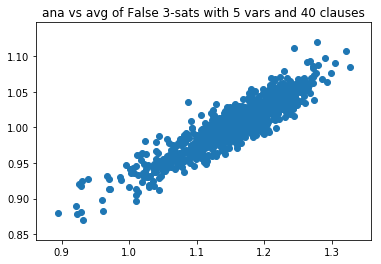

In [13]:
gen_and_print(1000, 3, 5, 40)